<h1>FIFA 23 ML Project  <img src="https://img.icons8.com/color/48/null/football-team.png"/></h1>

In [2505]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2506]:
import warnings
warnings.filterwarnings('ignore')

In [2507]:
data = pd.read_csv("../input/fifa-23-complete-player-dataset/players_fifa23.csv")
data.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [2508]:
data.shape

(18539, 90)

In [2509]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

"""'STRating', 'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating',
       'CAMRating', 'LMRating', 'CMRating', 'RMRating', 'LWBRating',
       'CDMRating', 'RWBRating', 'LBRating', 'CBRating', 'RBRating',
       'GKRating'"""
data = data[needed_columns]

<img src="https://gamesmix.net/wp-content/uploads/2022/03/FIFA-23.jpeg" width="900"/>

# EDA <img src="https://img.icons8.com/color/48/null/strategy-board.png" width="38"/>

<h3>1. Does the Age of the Player Affect on his Ball Control Performance?</h3>

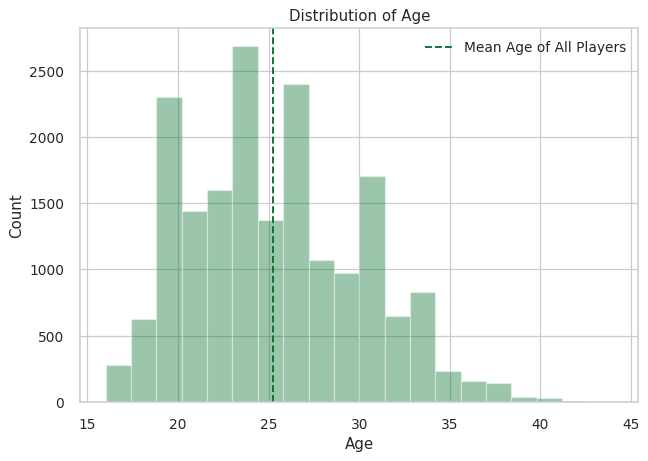

In [2510]:
sns.set_palette("Greens_r")
plt.figure(dpi=90)
sns.distplot(x=data['Age'], kde=False, bins=20)
plt.axvline(x=np.mean(data['Age']), ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

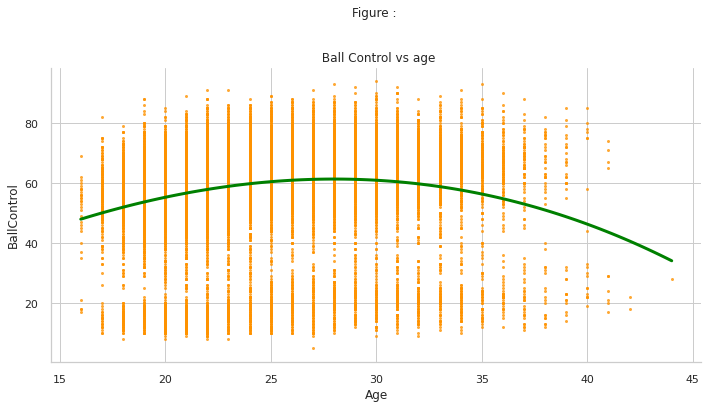

In [2511]:
sns.set_palette("Wistia_r")
sns.lmplot(x="Age", y="BallControl",data=data,markers=".",
           order=3, ci=None, line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Ball Control vs age");
plt.show()

<h4>- So We can deduce that the age has an effect on the Player's Ball Control.</br></br>
    - While the Age is increasing, the Ball Control decreases.
</h4>

<p style="font-size:20px">So I can advice my Club to buy Players with age < 30 So the Player has a great Ball Control skill.</p>

<h3>2. Show how Height affects different factors like stamina, dribbling, pace, passing and HeadingAccuracy:</h3> 

<AxesSubplot:xlabel='Height', ylabel='Value'>

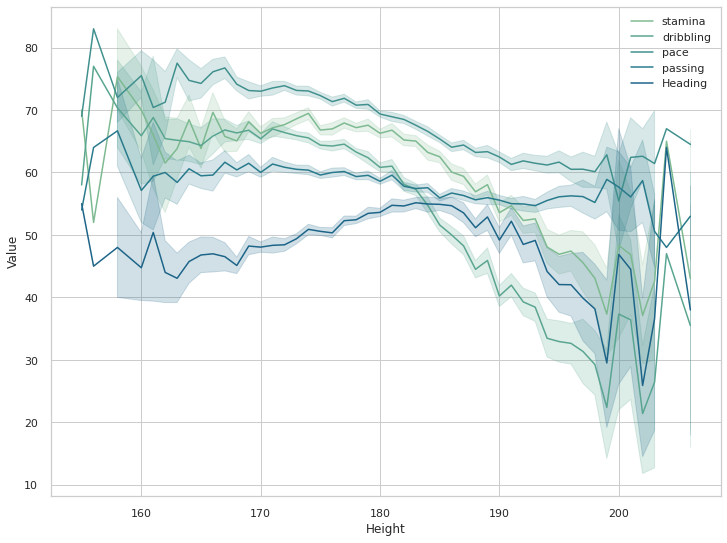

In [2512]:
sns.set_palette("crest")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Value")

sns.lineplot(x='Height', y='Stamina', data=data, legend='brief', label='stamina')
sns.lineplot(x='Height', y='Dribbling', data=data, legend='brief', label='dribbling')
sns.lineplot(x='Height', y='PaceTotal', data=data, legend='brief', label='pace')
sns.lineplot(x='Height', y='PassingTotal', data=data, legend='brief', label='passing')
sns.lineplot(x='Height', y='HeadingAccuracy', data=data, legend='brief', label='Heading')

<h4>- As height increases, features like stamina, dribbling, pace, passing decreases.</br> </br>
    - As height increases, features like Heading increase.</h4>

<h3>3. Show if there is a realtion between Wage and Overall of the Players:</h3>

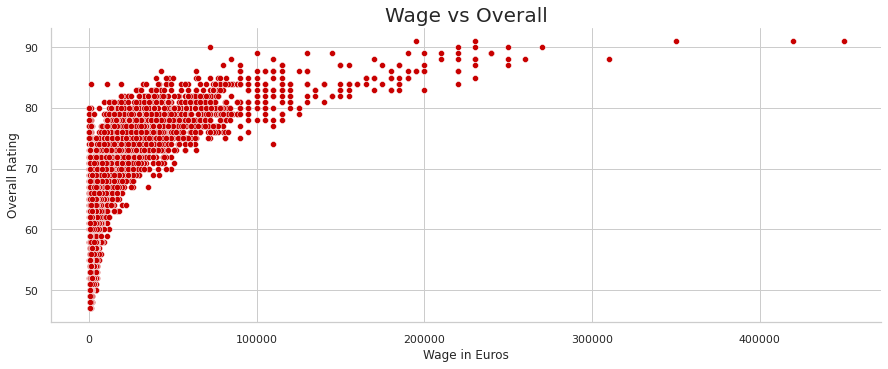

In [2513]:
sns.set_palette("seismic_r")
sns.relplot(x='WageEUR',y='Overall',palette = 'viridis', aspect=2.5,data=data)
plt.title('Wage vs Overall',fontsize = 20)
plt.xlabel('Wage in Euros')
plt.ylabel('Overall Rating')
plt.show()

<h4>- As the Overall Rating Increase, the Wage of the Player Increases too.</h4>

<h3>4. Show the top Quikest Players:</h3>

In [2514]:
top_acc = data.sort_values(by=["Acceleration"], ascending=False)

<AxesSubplot:xlabel='Name', ylabel='Acceleration'>

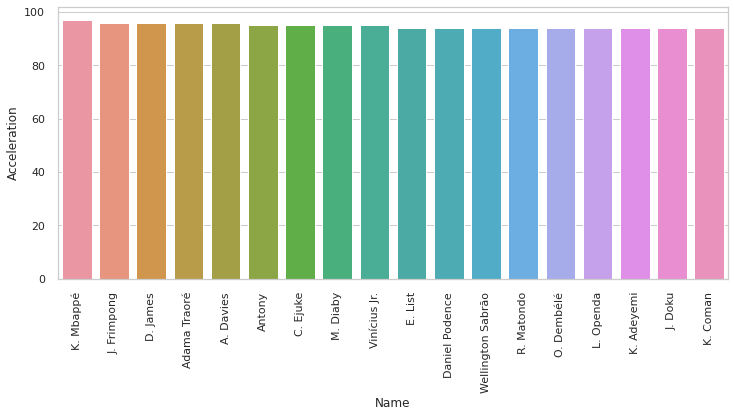

In [2515]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Acceleration", data=top_acc.head(20))

<h3>5. Determine if their is a relation between the Position of the Player and his Wage and Value:</h3>

<AxesSubplot:xlabel='BestPosition', ylabel='WageEUR'>

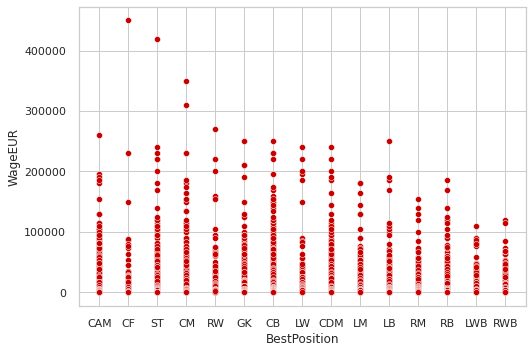

In [2516]:
sns.scatterplot(x="BestPosition", y="WageEUR", data=data)

<AxesSubplot:xlabel='BestPosition', ylabel='ValueEUR'>

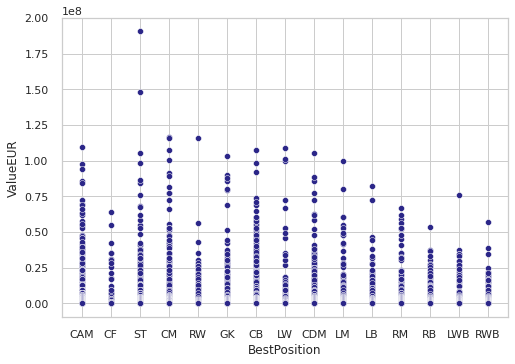

In [2517]:
sns.set_palette("CMRmap")
sns.scatterplot(x="BestPosition", y="ValueEUR", data=data)

<h4>- So we can see that the Players in Positions LM, RM, RB, LWB, RWB got the lowest Wages.</br></br>
    - And the Players With Positions LB, RB, LWB, RWB have the lowest Values.</h4>

<h3>6. See the Nationality of the Players that got the heighest Wages:</h3>

In [2518]:
top_wages = data.sort_values(by=["WageEUR"], ascending=False)

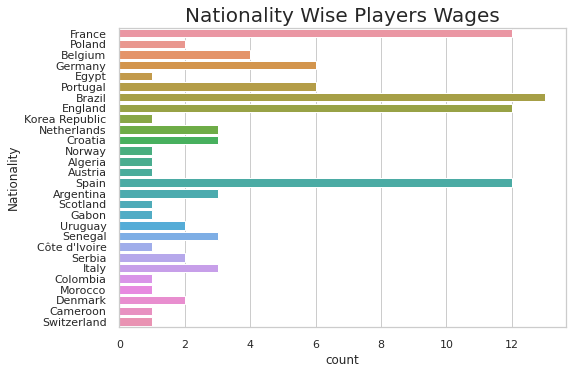

In [2519]:
sns.countplot(y="Nationality",data=top_wages.head(100))
plt.title("Nationality Wise Players Wages",
          fontsize=20);

<h4>So we can deduce that the Players that got the Maximum Wage are from Brazil, France, England and Spain.</h4>

<h3>7. Show the effect of the Age on the Potential of the Players:</h3>

<AxesSubplot:xlabel='Age', ylabel='Potential'>

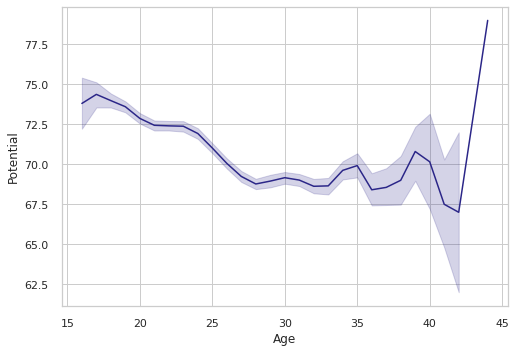

In [2520]:
sns.lineplot(x="Age", y="Potential", data=data)

<h4>While the Age Increases the Potential of the Player Decreases.</h4>

<h3>8. View the Top 50 Players and their Clubs:</h3>

In [2521]:
top_rated = data.sort_values(by=["Overall"], ascending=False)
top50 = top_rated.head(50)

<h3>Plot The Top 50 Players</h3>

<AxesSubplot:xlabel='Name', ylabel='Overall'>

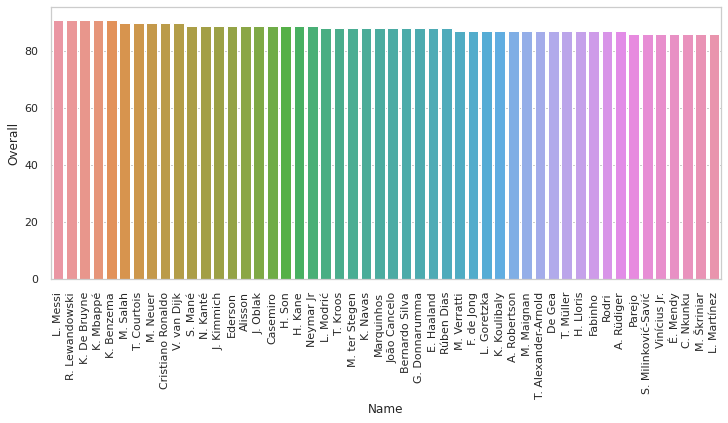

In [2522]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Overall", data=top50)

<AxesSubplot:xlabel='Club', ylabel='count'>

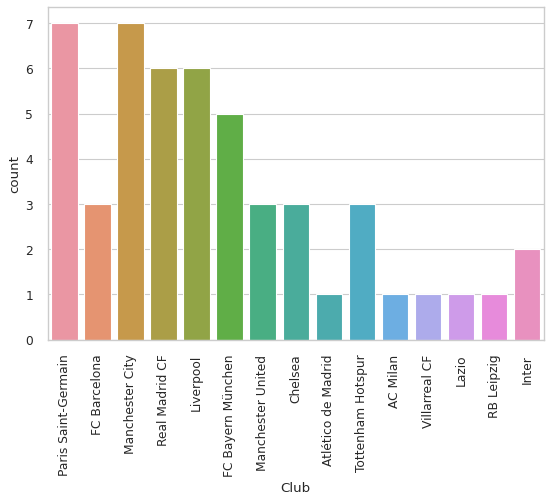

In [2523]:
plt.figure(dpi=80)
plt.xticks(rotation=90)
sns.countplot(x="Club", data=top50)

<h4>- Paris Saint-Germainand Machester City have the maximum top Players numbers.</br></br>
    - Liverpool and Real Madrid have the second Maximum top Players numbers.</h4>


# Data Preprocessing:

<h3>1. Handle the missing values:</h3>

In [2524]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i, " ", data[i].isnull().sum())

ContractUntil   92


<h4>ContractUntil Column:</h4>

In [2525]:
print("The percentage of the null values is: ", (data["ContractUntil"].isnull().sum()/data.shape[0])*100, "%")

The percentage of the null values is:  0.49625114623226707 %


As the percentage of nulls is small so we can drop the values of nulls in that column.

In [2526]:
data.drop(data[data["ContractUntil"].isnull()].index, axis = 0, inplace =True)

In [2527]:
data["ContractUntil"].isnull().sum()

0

<h3>2. Handle The Categorical Columns:</h3>

In [2528]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

Name
BestPosition
Club
PreferredFoot
Nationality
AttackingWorkRate
DefensiveWorkRate


In [2529]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data["PreferredFoot"] = le.fit_transform(data["PreferredFoot"])
data["AttackingWorkRate"] = le.fit_transform(data["AttackingWorkRate"])
data["DefensiveWorkRate"] = le.fit_transform(data["DefensiveWorkRate"])
data["Club"] = le.fit_transform(data["Club"])


In [2530]:
merge_pos = {'LWB' : 'LW', 'RWB': 'RW', 'ST': 'CF', 'CAM': 'CM', 'CDM': 'CM'}
'''{'CAM': 0, 'CF': 1, 'ST': 2, 'CM': 3, 'RW': 4, 'GK': 5, 'CB': 6, 'LW': 7, 'CDM': 8, 'LM': 9, 'LB': 10,
            'RM': 11, 'RB': 12, 'LWB': 13 #LW OR LB OR LM, 'RWB': 14 #RW OR RB OR RM}'''

data = data.replace({'BestPosition': merge_pos})

In [2531]:
mapping = {'CF': 0, 'CM': 1, 'RW': 2, 'GK': 3, 'CB': 4, 'LW': 5, 'LM': 6, 'LB': 7,
            'RM': 8, 'RB': 9}

data = data.replace({'BestPosition': mapping})

<h2>Split the Data to Train and Test sets:</h2>

In [2532]:
X = data.drop(["BestPosition", "Nationality", "ID"], axis = 1)
Y = pd.DataFrame(data["BestPosition"])

top = data.sort_values(by=["Overall"], ascending=False).head(100)

In [2533]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [2534]:
X_Train = X_Train.drop(["Name"], axis = 1)
test_names = X_Test["Name"]
X_Test = X_Test.drop(["Name"], axis = 1)

top_pos = top["BestPosition"]
top_names = top["Name"]
top = top.drop(["Name", "BestPosition", "Nationality", "ID"], axis = 1)

<h3>3. Handle the Imbalanced Data:</h3>

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

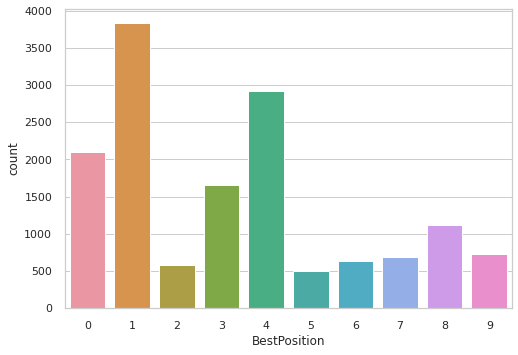

In [2535]:
sns.countplot(x="BestPosition", data = Y_Train)

In [2536]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling  import RandomOverSampler

sm = SMOTE(random_state=42)
#X_Train, Y_Train = sm.fit_resample(X_Train, Y_Train)
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)

In [2537]:
print(f' X_shape: {X_Train.shape} \n y_shape: {Y_Train.shape}')

 X_shape: (21362, 61) 
 y_shape: (21362, 1)


<AxesSubplot:xlabel='BestPosition', ylabel='count'>

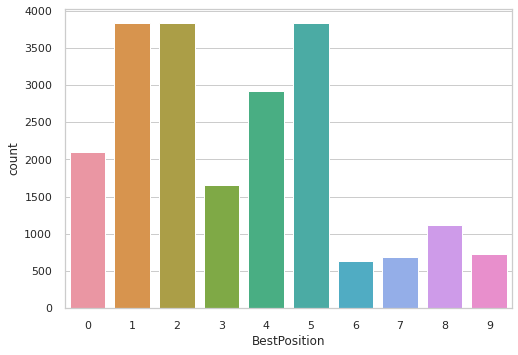

In [2538]:
sns.countplot(x="BestPosition", data = Y_Train)

<h3>4. Feature Scaling:</h3>

In [2539]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_Train = mms.fit_transform(X_Train)
X_Test = mms.fit_transform(X_Test)

top = mms.fit_transform(top)

# Modeling

## A. Predict the Position of the Player Using 8 Classification Algorithms:

In [2540]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))
    
models_names = []
models_scores = []

<h3>1. Logistic Regression:</h3>

In [2541]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [2542]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [2543]:
lr.score(X_Train, Y_Train)

0.7442655182099054

In [2544]:
lr.score(X_Test, Y_Test)

0.7373983739837399

In [2545]:
Y_Pred_lr = lr.predict(X_Test)

In [2546]:
models_names.append("Logistic Regression")
models_scores.append(lr.score(X_Test, Y_Test))

In [2547]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       522
           1       0.91      0.78      0.84       962
           2       0.22      0.74      0.34       132
           3       1.00      1.00      1.00       391
           4       0.88      0.96      0.92       711
           5       0.20      0.68      0.31       116
           6       0.48      0.07      0.12       168
           7       0.81      0.15      0.25       178
           8       0.68      0.47      0.56       313
           9       0.72      0.31      0.44       197

    accuracy                           0.74      3690
   macro avg       0.68      0.61      0.57      3690
weighted avg       0.82      0.74      0.74      3690



<h3>2. Random Forest:</h3>

In [2548]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=50)

In [2549]:
rf.fit(X_Train, Y_Train)

RandomForestClassifier(n_estimators=50)

In [2550]:
rf.score(X_Train, Y_Train)

0.9999531879037543

In [2551]:
rf.score(X_Test, Y_Test)

0.7970189701897019

In [2552]:
Y_Pred_rf = rf.predict(X_Test)

In [2553]:
models_names.append("Random Forest")
models_scores.append(rf.score(X_Test, Y_Test))

In [2554]:
classification_report_fun("Random Forest", Y_Test, Y_Pred_rf)

The Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       522
           1       0.81      0.85      0.83       962
           2       0.35      0.33      0.34       132
           3       1.00      1.00      1.00       391
           4       0.88      0.95      0.91       711
           5       0.38      0.26      0.31       116
           6       0.69      0.35      0.46       168
           7       0.67      0.69      0.68       178
           8       0.63      0.58      0.61       313
           9       0.67      0.64      0.66       197

    accuracy                           0.80      3690
   macro avg       0.69      0.66      0.67      3690
weighted avg       0.79      0.80      0.79      3690



<h3>3. XGB:</h3>

In [2555]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [2556]:
xgb.fit(X_Train, Y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [2557]:
xgb.score(X_Train, Y_Train)

1.0

In [2558]:
xgb.score(X_Test, Y_Test)

0.8205962059620596

In [2559]:
Y_Pred_xgb = xgb.predict(X_Test)

In [2560]:
models_names.append("XGB")
models_scores.append(xgb.score(X_Test, Y_Test))

In [2561]:
classification_report_fun("XGB", Y_Test, Y_Pred_xgb)

The Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       522
           1       0.89      0.85      0.87       962
           2       0.32      0.33      0.33       132
           3       1.00      1.00      1.00       391
           4       0.91      0.96      0.93       711
           5       0.41      0.47      0.44       116
           6       0.63      0.48      0.54       168
           7       0.77      0.64      0.70       178
           8       0.63      0.71      0.67       313
           9       0.69      0.73      0.71       197

    accuracy                           0.82      3690
   macro avg       0.72      0.71      0.71      3690
weighted avg       0.82      0.82      0.82      3690



<h3>4. Decision Tree:</h3>

In [2562]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 39,max_depth = 10)

In [2563]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [2564]:
dt.score(X_Train, Y_Train)

0.7675311300440034

In [2565]:
dt.score(X_Test, Y_Test)

0.6401084010840108

In [2566]:
Y_Pred_dt = dt.predict(X_Test)

In [2567]:
models_names.append("Decision Tree")
models_scores.append(dt.score(X_Test, Y_Test))

In [2568]:
classification_report_fun("Decision Tree", Y_Test, Y_Pred_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.88      0.72      0.80       522
           1       0.79      0.64      0.71       962
           2       0.15      0.64      0.24       132
           3       1.00      1.00      1.00       391
           4       0.89      0.81      0.85       711
           5       0.17      0.49      0.25       116
           6       0.54      0.27      0.36       168
           7       0.45      0.36      0.40       178
           8       0.46      0.30      0.36       313
           9       0.60      0.28      0.38       197

    accuracy                           0.64      3690
   macro avg       0.59      0.55      0.53      3690
weighted avg       0.74      0.64      0.67      3690



<h3>5. Adaboost:</h3>

In [2569]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [2570]:
ada.fit(X_Train, Y_Train)

AdaBoostClassifier()

In [2571]:
ada.score(X_Train, Y_Train)

0.5441438067596667

In [2572]:
ada.score(X_Test, Y_Test)

0.5943089430894309

In [2573]:
Y_Pred_ada = dt.predict(X_Test)

In [2574]:
models_names.append("Adaboost")
models_scores.append(ada.score(X_Test, Y_Test))

In [2575]:
classification_report_fun("Adaboost", Y_Test, Y_Pred_ada)

The Classification Report for Adaboost Classifier:
              precision    recall  f1-score   support

           0       0.88      0.72      0.80       522
           1       0.79      0.64      0.71       962
           2       0.15      0.64      0.24       132
           3       1.00      1.00      1.00       391
           4       0.89      0.81      0.85       711
           5       0.17      0.49      0.25       116
           6       0.54      0.27      0.36       168
           7       0.45      0.36      0.40       178
           8       0.46      0.30      0.36       313
           9       0.60      0.28      0.38       197

    accuracy                           0.64      3690
   macro avg       0.59      0.55      0.53      3690
weighted avg       0.74      0.64      0.67      3690



<h3>6. light GBM:</h3>

In [2576]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(max_depth = 15)

In [2577]:
lgbm.fit(X_Train, Y_Train)

LGBMClassifier(max_depth=15)

In [2578]:
lgbm.score(X_Train, Y_Train)

1.0

In [2579]:
lgbm.score(X_Test, Y_Test)

0.8165311653116532

In [2580]:
Y_Pred_lgbm = lgbm.predict(X_Test)

In [2581]:
models_names.append("light GBM")
models_scores.append(lgbm.score(X_Test, Y_Test))

In [2582]:
classification_report_fun("light GBM", Y_Test, Y_Pred_lgbm)

The Classification Report for light GBM Classifier:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       522
           1       0.88      0.86      0.87       962
           2       0.34      0.40      0.37       132
           3       1.00      1.00      1.00       391
           4       0.91      0.96      0.93       711
           5       0.33      0.45      0.38       116
           6       0.64      0.42      0.51       168
           7       0.79      0.58      0.67       178
           8       0.66      0.69      0.67       313
           9       0.71      0.70      0.70       197

    accuracy                           0.82      3690
   macro avg       0.72      0.70      0.70      3690
weighted avg       0.82      0.82      0.82      3690



<h3>7. CatBoost:</h3>

In [2583]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(max_depth = 10, iterations=10, learning_rate=0.3)

In [2584]:
cb.fit(X_Train, Y_Train)

0:	learn: 1.4426792	total: 359ms	remaining: 3.23s
1:	learn: 1.2005085	total: 736ms	remaining: 2.94s
2:	learn: 1.0485511	total: 1.1s	remaining: 2.57s
3:	learn: 0.9422756	total: 1.47s	remaining: 2.2s
4:	learn: 0.8644388	total: 1.83s	remaining: 1.83s
5:	learn: 0.8038152	total: 2.2s	remaining: 1.47s
6:	learn: 0.7415782	total: 2.56s	remaining: 1.1s
7:	learn: 0.7038639	total: 2.94s	remaining: 735ms
8:	learn: 0.6624913	total: 3.32s	remaining: 369ms
9:	learn: 0.6273684	total: 3.69s	remaining: 0us


In [2585]:
cb.score(X_Train, Y_Train)

0.8150454077333583

In [2586]:
cb.score(X_Test, Y_Test)

0.7065040650406504

In [2587]:
Y_Pred_cb = cb.predict(X_Test)

In [2588]:
models_names.append("CatBoost")
models_scores.append(cb.score(X_Test, Y_Test))

In [2589]:
classification_report_fun("CatBoost", Y_Test, Y_Pred_cb)

The Classification Report for CatBoost Classifier:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       522
           1       0.83      0.78      0.80       962
           2       0.18      0.70      0.29       132
           3       1.00      1.00      1.00       391
           4       0.91      0.92      0.91       711
           5       0.20      0.66      0.30       116
           6       0.65      0.23      0.34       168
           7       0.60      0.15      0.24       178
           8       0.69      0.35      0.46       313
           9       0.69      0.17      0.28       197

    accuracy                           0.71      3690
   macro avg       0.67      0.58      0.55      3690
weighted avg       0.79      0.71      0.72      3690



<h3>8. KNN:</h3>

In [2590]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)

In [2591]:
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=8)

In [2592]:
knn.score(X_Train, Y_Train)

0.8141559779046905

In [2593]:
knn.score(X_Test, Y_Test)

0.6447154471544716

In [2594]:
Y_Pred_knn = cb.predict(X_Test)

In [2595]:
models_names.append("KNN")
models_scores.append(knn.score(X_Test, Y_Test))

In [2596]:
classification_report_fun("KNN", Y_Test, Y_Pred_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       522
           1       0.83      0.78      0.80       962
           2       0.18      0.70      0.29       132
           3       1.00      1.00      1.00       391
           4       0.91      0.92      0.91       711
           5       0.20      0.66      0.30       116
           6       0.65      0.23      0.34       168
           7       0.60      0.15      0.24       178
           8       0.69      0.35      0.46       313
           9       0.69      0.17      0.28       197

    accuracy                           0.71      3690
   macro avg       0.67      0.58      0.55      3690
weighted avg       0.79      0.71      0.72      3690



<h3>Compare the Test Accuracy of the 8 Classification Algorithms:</h3>

In [2597]:
comp = pd.DataFrame()
comp['name'] = models_names
comp['score'] = models_scores
comp

,name,score
0,Logistic Regression,0.737398
1,Random Forest,0.797019
2,XGB,0.820596
3,Decision Tree,0.640108
4,Adaboost,0.594309
5,light GBM,0.816531
6,CatBoost,0.706504
7,KNN,0.644715


In [2598]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.737398
1,Random Forest,0.797019
2,XGB,0.820596
3,Decision Tree,0.640108
4,Adaboost,0.594309
5,light GBM,0.816531
6,CatBoost,0.706504
7,KNN,0.644715


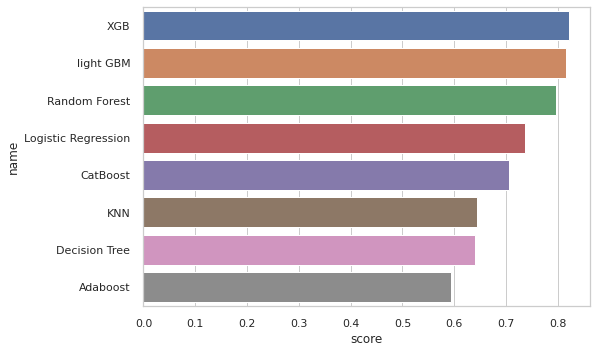

In [2599]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))

<h3>So We can deduce that the Best Algorithm for this Data is the XGB </h3>

<h3>Test the Algorithm on the top 20 Players:</h3>

In [2600]:
top = pd.DataFrame(top)

for i in range(top.shape[0]):
    pred_pos = lgbm.predict(top.iloc[[i]])[0]
    
    pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]
    true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]

    print('Name: {}\nPrediction: {}\n True Best Pos: {}\n'.format(top_names.iloc[i], pred, true_pos))

Name: L. Messi
Prediction: CM
 True Best Pos: CM

Name: R. Lewandowski
Prediction: CF
 True Best Pos: CF

Name: K. De Bruyne
Prediction: CM
 True Best Pos: CM

Name: K. Mbappé
Prediction: CF
 True Best Pos: CF

Name: K. Benzema
Prediction: CF
 True Best Pos: CF

Name: M. Salah
Prediction: RW
 True Best Pos: RW

Name: T. Courtois
Prediction: GK
 True Best Pos: GK

Name: M. Neuer
Prediction: GK
 True Best Pos: GK

Name: Cristiano Ronaldo
Prediction: CF
 True Best Pos: CF

Name: V. van Dijk
Prediction: CB
 True Best Pos: CB

Name: S. Mané
Prediction: CF
 True Best Pos: LM

Name: N. Kanté
Prediction: CM
 True Best Pos: CM

Name: J. Kimmich
Prediction: CM
 True Best Pos: CM

Name: Ederson
Prediction: GK
 True Best Pos: GK

Name: Alisson
Prediction: GK
 True Best Pos: GK

Name: J. Oblak
Prediction: GK
 True Best Pos: GK

Name: Casemiro
Prediction: CM
 True Best Pos: CM

Name: H. Son
Prediction: LW
 True Best Pos: LW

Name: H. Kane
Prediction: CF
 True Best Pos: CF

Name: Neymar Jr
Prediction

## B. Group the Players in Clusters Based on their Similarities Using 4 Clustering Algorithms:

<h3>Extracting players with overall above 86:</h3>

In [2601]:
X_clus = data[data.Overall > 86] 
X_clus.shape

(43, 65)

In [2602]:
names = X_clus["Name"].tolist() # saving names for later

X_clus = X_clus.drop(['Name', 'Nationality', 'ID'], axis = 1)

#Feature Scaling
X_clus = mms.fit_transform(X_clus)

<h3>Perform Dimentionality Reduction:</h3>

In [2603]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # Reduce the Dimention of the Data to its half
X_clus = pd.DataFrame(pca.fit_transform(X_clus))

<h2>Clustering:</h2>

In [2604]:
clus_names = []
clus_scores = []

<h3>1. KMeans:</h3>

<h4>Use the Elbow function to determine the optimal number of Clusters:</h4>

In [2605]:
import random
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

visualizer = KElbowVisualizer(KMeans(), timings=False)

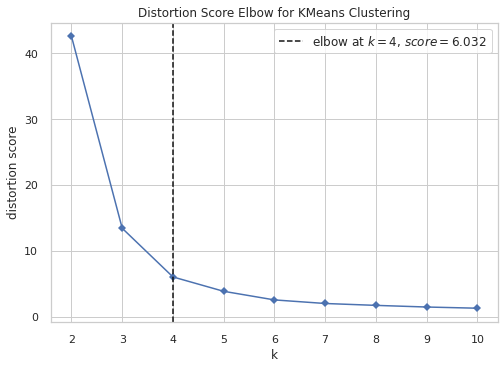

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2606]:
visualizer.fit(X_clus)
visualizer.show()

<h4>So the Optimal number of clusters is 4</h4>

In [2607]:
kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(X_clus)

# get the cluster labels
labels = kmeans.predict(X_clus)

# cluster values
kmeans_clusters = kmeans.labels_.tolist()

In [2608]:
X_kmeans = X_clus.copy()
X_kmeans['cluster'] = kmeans_clusters
X_kmeans['name'] = names
X_kmeans.columns = ['x', 'y', 'cluster', 'name']
X_kmeans.head()

,x,y,cluster,name
0,-1.271683,-1.648421,3,L. Messi
1,-0.975886,-1.192317,3,K. Benzema
2,-1.189627,-1.173911,3,R. Lewandowski
3,-1.600086,-0.517118,2,K. De Bruyne
4,-1.335628,-1.381503,3,K. Mbappé


<h3>Plot the Clusters of the K-means Algorithm:</h3>

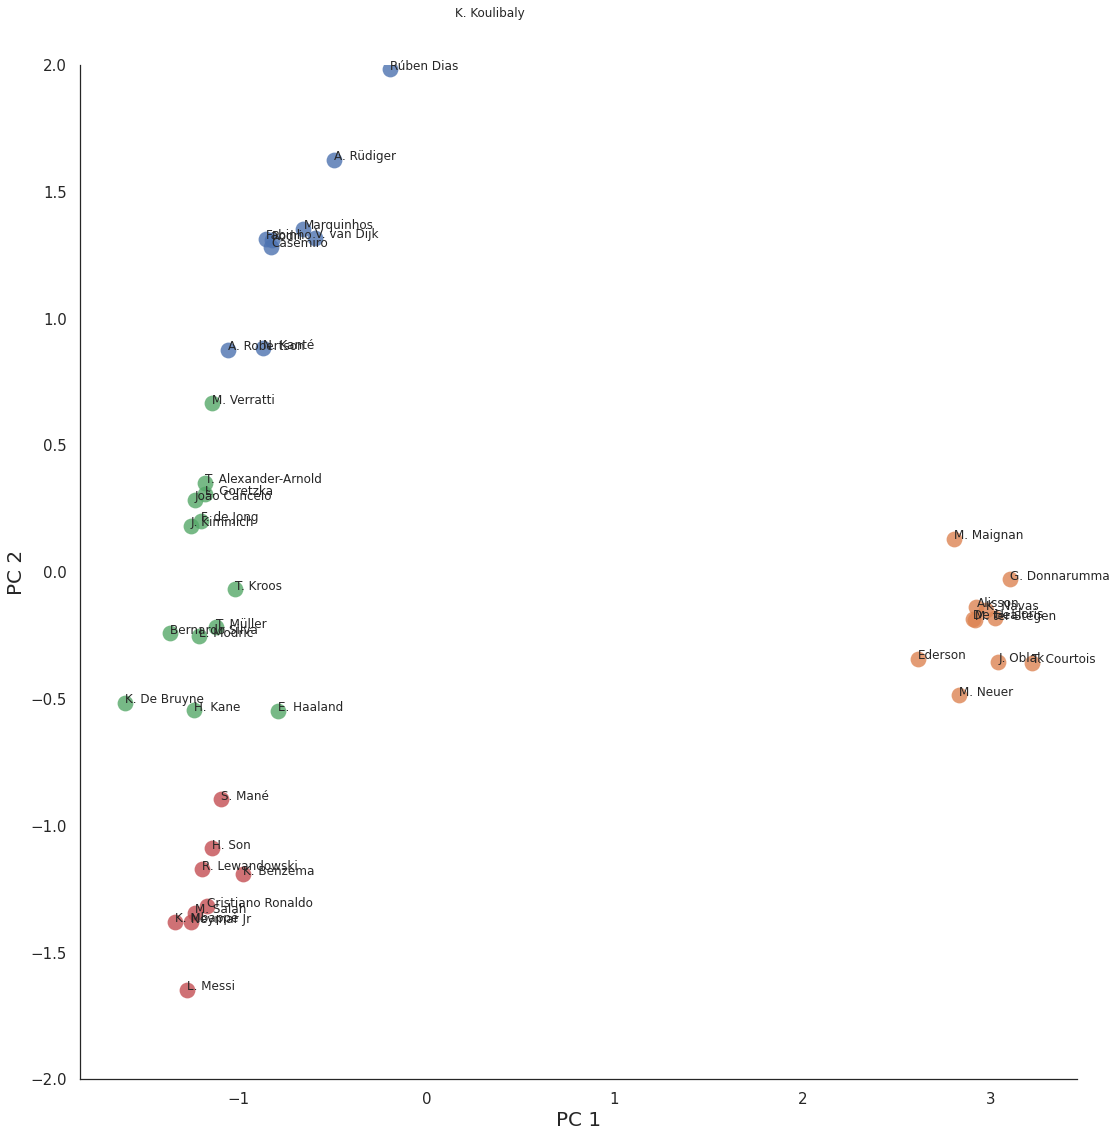

In [2609]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_kmeans, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_kmeans.x, X_kmeans.y, X_kmeans.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the K-means algorithm using Silhouette coefficient:</h3>

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. The score is bounded between <b>-1 for incorrect clustering and +1 for highly dense clustering</b>. </br>
Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated.

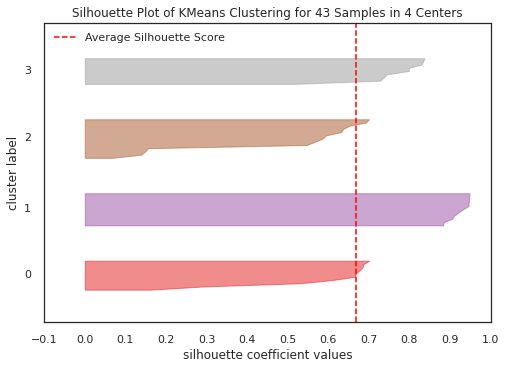

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 43 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [2610]:
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X_clus)    
sil_visualizer.show()

In [2611]:
silhouette_score(X_clus, kmeans.labels_)

0.6694690209060634

In [2612]:
clus_names.append("K-means")
clus_scores.append(silhouette_score(X_clus, kmeans.labels_))

<h3>2. Hirerichal Clustering:</h3>

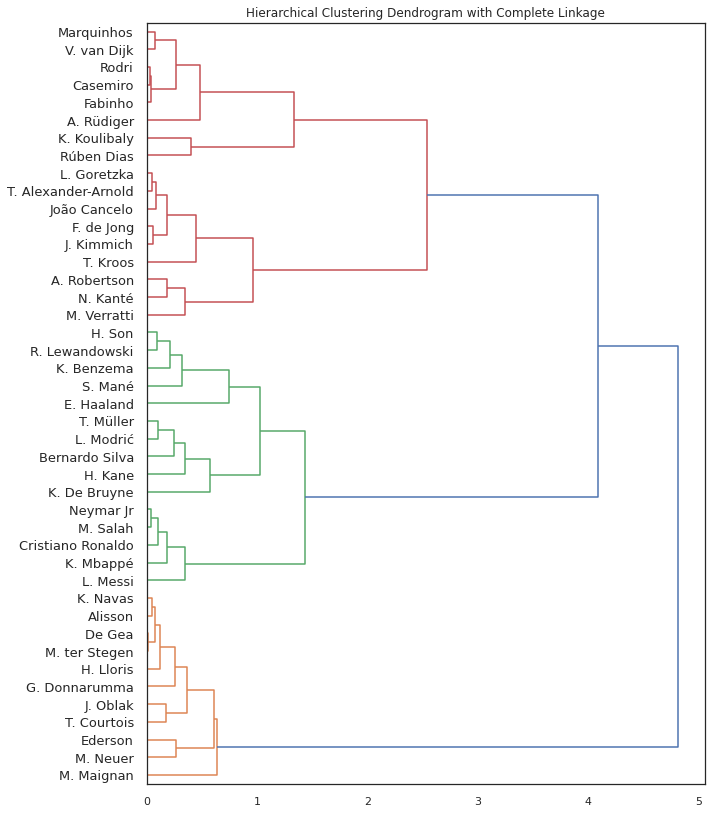

In [2613]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_clus, method="complete"), labels= names, leaf_font_size = 13, orientation='right')

In [2614]:
unique_colors = set(dendrogram['color_list'])
num_clusters_hir = len(unique_colors)-1
print("Optimal number of clusters is : ", num_clusters_hir)

Optimal number of clusters is :  3


In [2615]:
from sklearn.cluster import AgglomerativeClustering
cluster_hir = AgglomerativeClustering(n_clusters=num_clusters_hir, affinity='euclidean', linkage='ward')
cluster_hir.fit_predict(X_clus)

# cluster values
hir_clusters = cluster_hir.labels_.tolist()

In [2616]:
print("Estimated number of noise points:", list(cluster_hir.labels_).count(-1))

Estimated number of noise points: 0


In [2617]:
X_hir = X_clus.copy()
X_hir['cluster'] = hir_clusters
X_hir['name'] = names
X_hir.columns = ['x', 'y', 'cluster', 'name']
X_hir.head()

,x,y,cluster,name
0,-1.271683,-1.648421,0,L. Messi
1,-0.975886,-1.192317,0,K. Benzema
2,-1.189627,-1.173911,0,R. Lewandowski
3,-1.600086,-0.517118,0,K. De Bruyne
4,-1.335628,-1.381503,0,K. Mbappé


<h3>Plot the Clusters of the Hirerichal Clustering Algorithm:</h3>

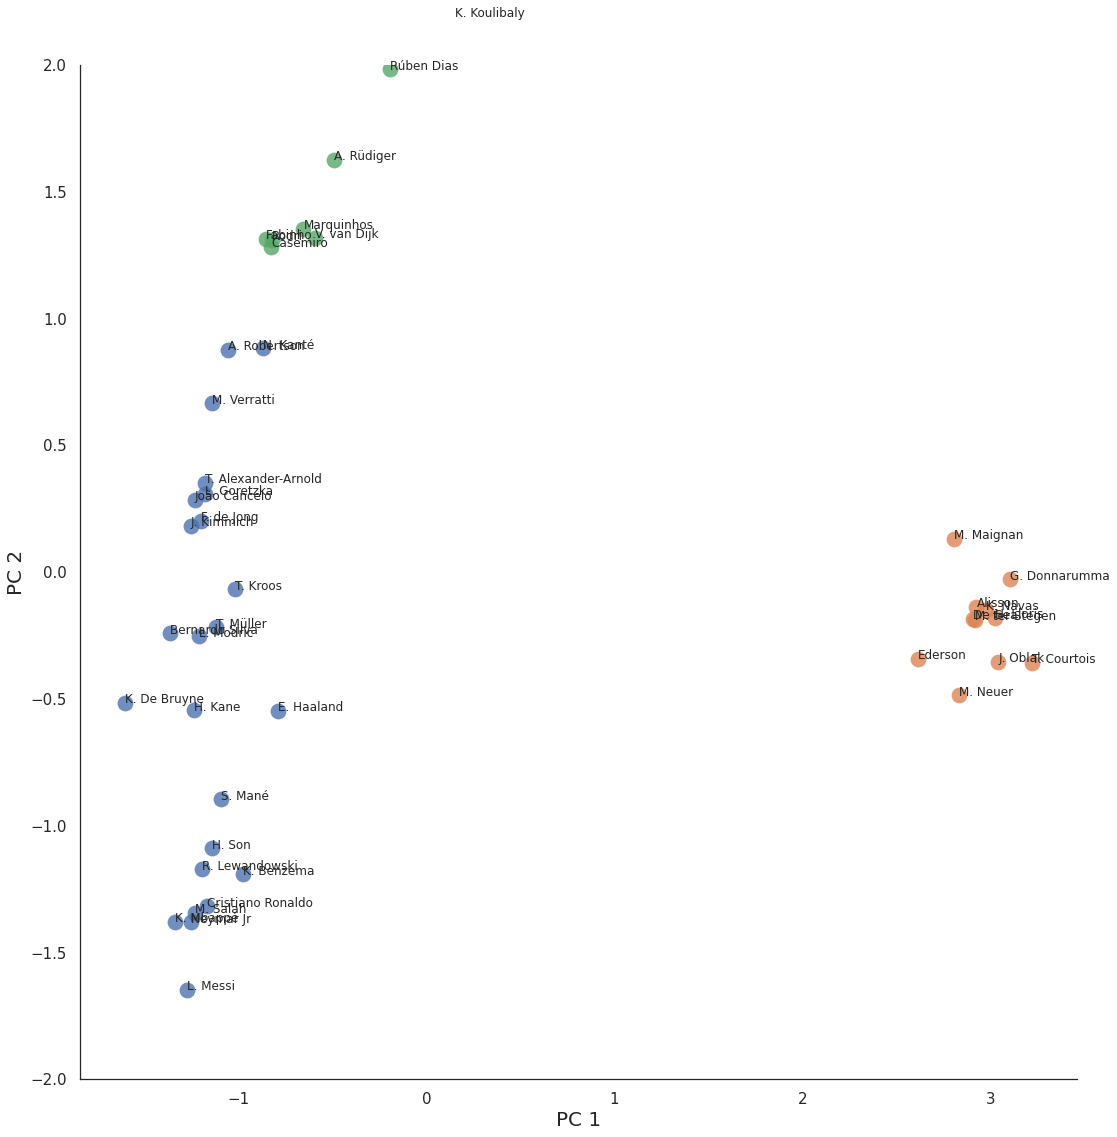

In [2618]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_hir, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_hir.x, X_hir.y, X_hir.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the Hirerichal Clustring algorithm using Silhouette coefficient:</h3>

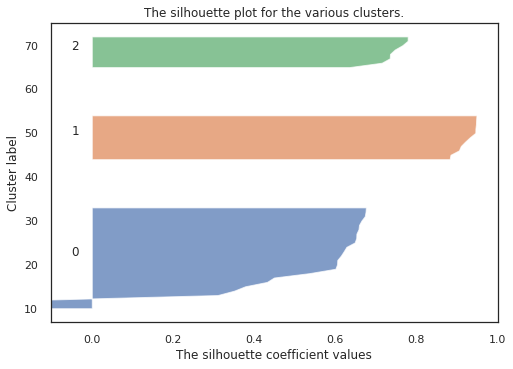

In [2619]:
cluster_labels = cluster_hir.labels_
silhouette_avg = silhouette_score(X_clus, cluster_hir.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)

fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])


y_lower = 10
for i in range(num_clusters_hir):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


plt.show()

In [2620]:
silhouette_score(X_clus, cluster_hir.labels_)

0.6324115032866934

In [2621]:
clus_names.append("Hirerichal Clustering")
clus_scores.append(silhouette_score(X_clus, cluster_hir.labels_))

<h3>3. Density-based clustering (DBSCAN):</h3>

In [2622]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db = DBSCAN(eps=0.429, min_samples=5)
db.fit_predict(X_clus)

# prediction for dbscan clusters
db_clusters = db.labels_.tolist()

In [2623]:
print("Number of Cluster in the Density Based Clustering:", len(set(db_clusters)))

Number of Cluster in the Density Based Clustering: 4


In [2624]:
X_db = X_clus.copy()
X_db['cluster'] = db_clusters
X_db['name'] = names
X_db.columns = ['x', 'y', 'cluster', 'name']
X_db.head()

,x,y,cluster,name
0,-1.271683,-1.648421,0,L. Messi
1,-0.975886,-1.192317,0,K. Benzema
2,-1.189627,-1.173911,0,R. Lewandowski
3,-1.600086,-0.517118,0,K. De Bruyne
4,-1.335628,-1.381503,0,K. Mbappé


<h3>Plot the Clusters of the DBSCAN Clustering Algorithm:</h3>

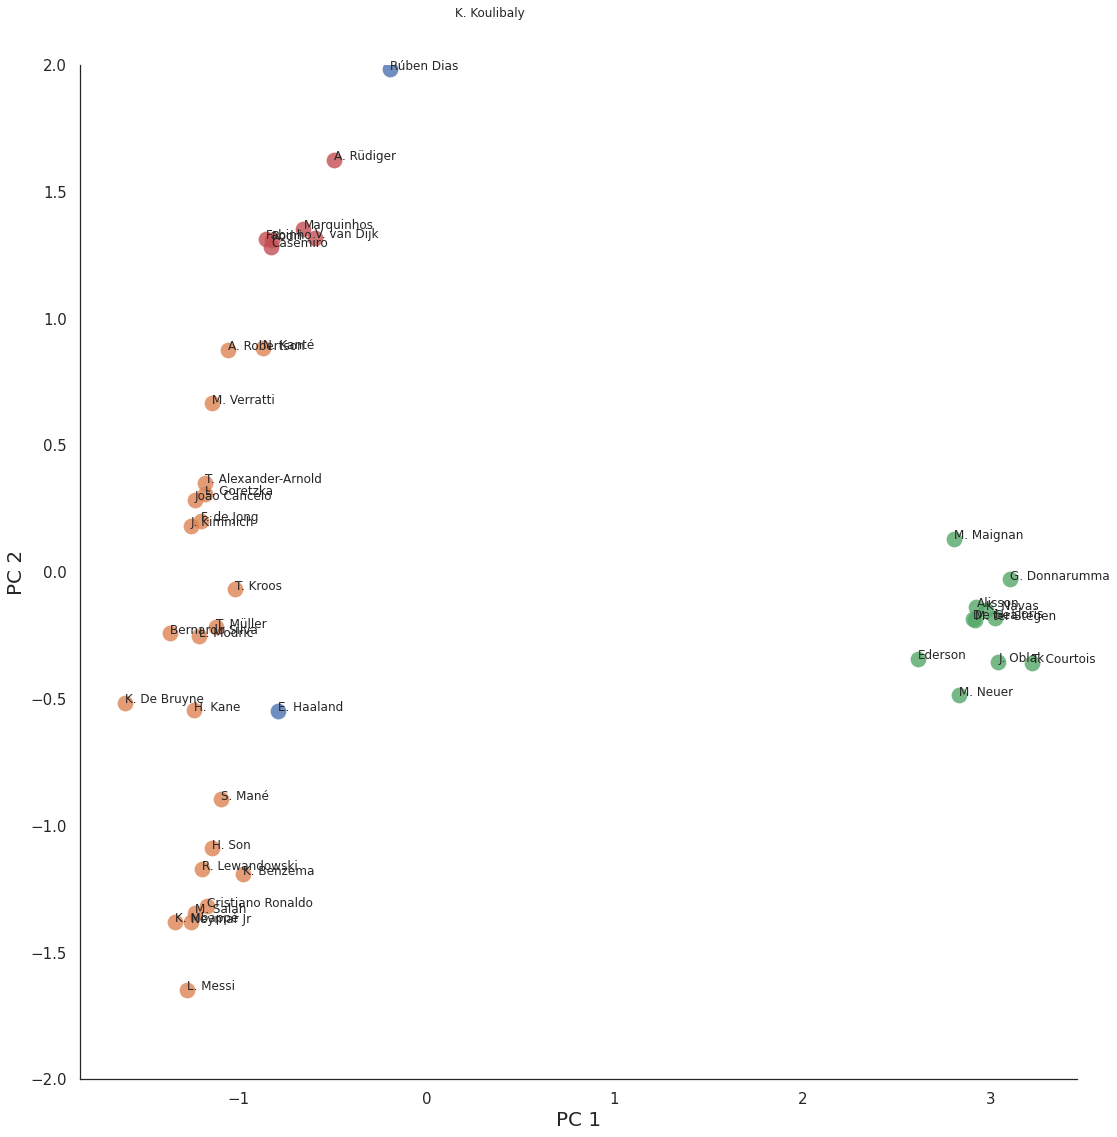

In [2625]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_db, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_db.x, X_db.y, X_db.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the DBSCAN Clustring algorithm using Silhouette coefficient:</h3>

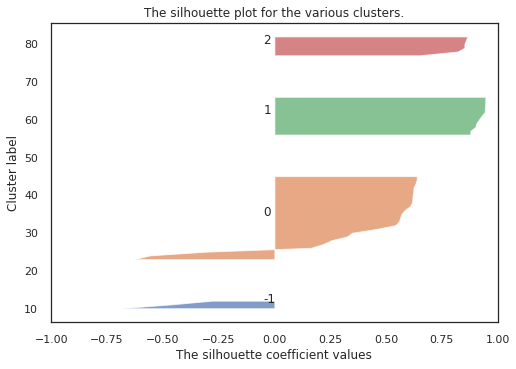

In [2626]:
cluster_labels = db.labels_
silhouette_avg = silhouette_score(X_clus, db.labels_)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-1, 1])

num_clusters = len(set(db_clusters))
y_lower = 10
for i in range(-1, num_clusters-1):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

In [2627]:
silhouette_score(X_clus, db.labels_)

0.5185138125548274

In [2628]:
clus_names.append("DBSCAN")
clus_scores.append(silhouette_score(X_clus, db.labels_))

<h3>4. Distribution-based clustering:</h3>

In [2629]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X_clus)

gmm_clusters = gmm.predict(X_clus).tolist()

In [2630]:
X_gmm = X_clus.copy()
X_gmm['cluster'] = gmm_clusters
X_gmm['name'] = names
X_gmm.columns = ['x', 'y', 'cluster', 'name']
X_gmm.head()

,x,y,cluster,name
0,-1.271683,-1.648421,2,L. Messi
1,-0.975886,-1.192317,2,K. Benzema
2,-1.189627,-1.173911,2,R. Lewandowski
3,-1.600086,-0.517118,3,K. De Bruyne
4,-1.335628,-1.381503,2,K. Mbappé


<h3>Plot the Clusters of the Distribution-based Clustering Algorithm:</h3>

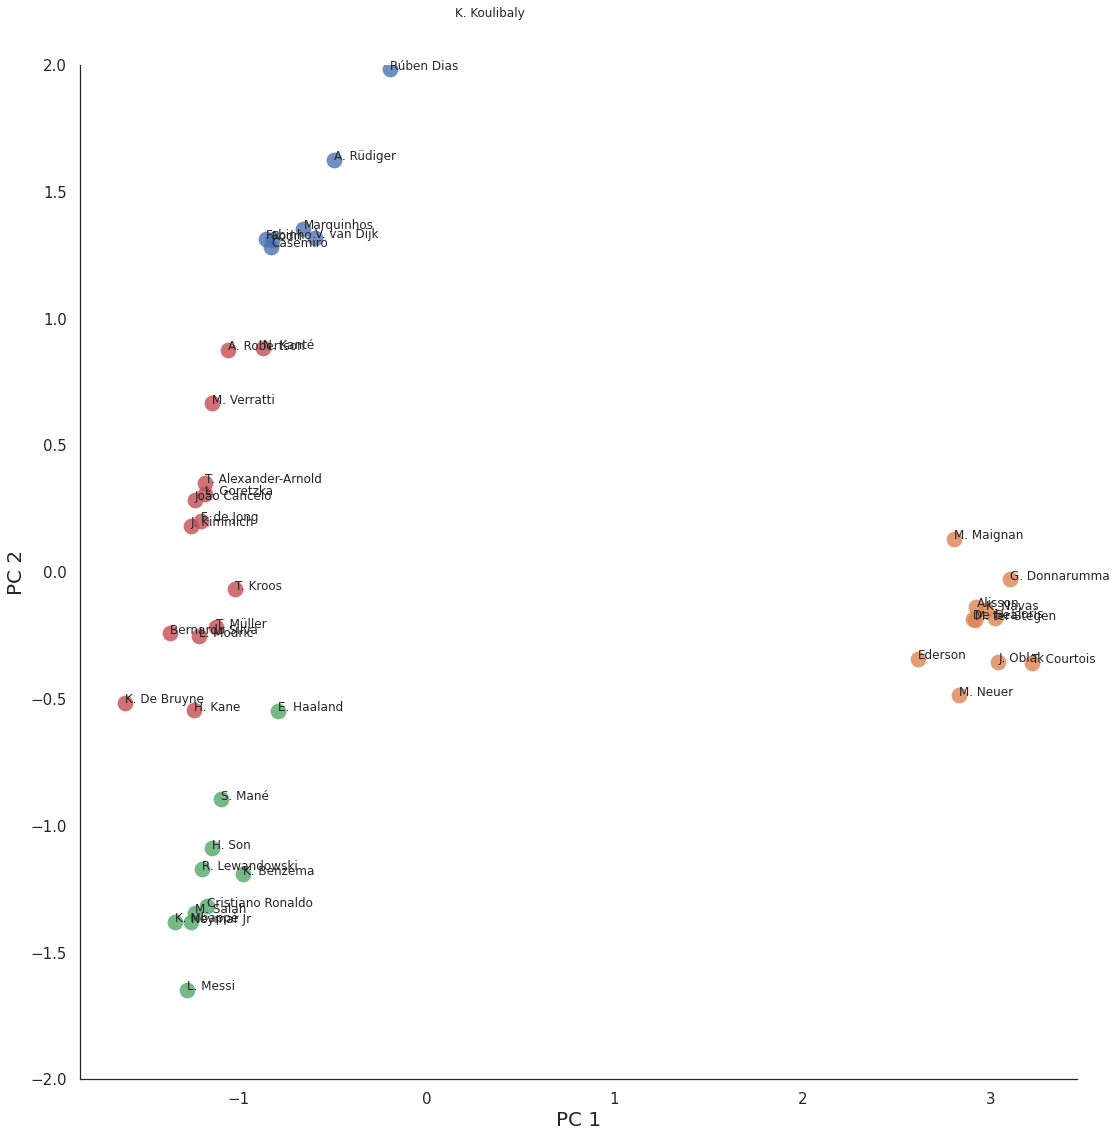

In [2631]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = X_gmm, legend=False,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(X_gmm.x, X_gmm.y, X_gmm.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

<h3>Evaluate the Distribution-based Clustring algorithm using Silhouette coefficient:</h3>

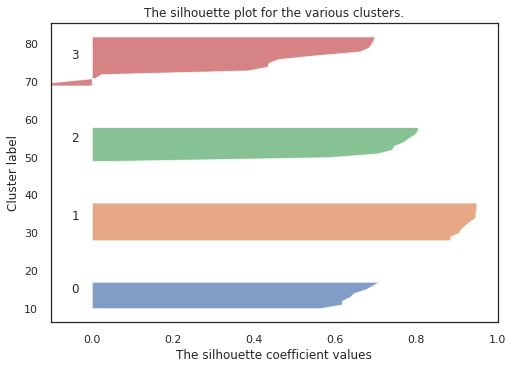

In [2632]:
cluster_labels = np.array(gmm_clusters)
silhouette_avg = silhouette_score(X_clus, cluster_labels)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_clus, cluster_labels)
fig, ax1 = plt.subplots(1)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])

num_clusters = len(set(gmm_clusters))
y_lower = 10
for i in range(num_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                     alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

plt.show()

In [2633]:
silhouette_score(X_clus, cluster_labels)

0.6410613803081933

In [2634]:
clus_names.append("Distribution-based")
clus_scores.append(silhouette_score(X_clus, cluster_labels))

<h3>Compare the 4 Clustring Algorithms based on the Silhouette Score:</h3>

In [2635]:
comp = pd.DataFrame()
comp['name'] = clus_names
comp['score'] = clus_scores
comp

,name,score
0,K-means,0.669469
1,Hirerichal Clustering,0.632412
2,DBSCAN,0.518514
3,Distribution-based,0.641061


In [2636]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,K-means,0.669469
1,Hirerichal Clustering,0.632412
2,DBSCAN,0.518514
3,Distribution-based,0.641061


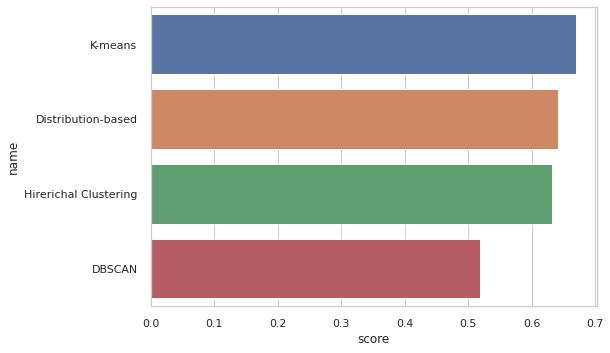

In [2637]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))

<h3>So Based on The Silhouette Score, The Hirerichal Clustring is the best Clustering Algorithm for this Data.</h3>